# EDA NICOLA COLUSSO

### OBJETIVOS

El propósito de este ejercicio es aprender a realizar un flujo completo y ordenado de análisis exploratorio de datos (EDA) sobre un dataset real. No se busca profundizar en análisis estadísticos avanzados, sino dominar las fases fundamentales que permiten comprender, limpiar y describir un conjunto de datos antes de aplicar cualquier tipo de modelado o interpretación más compleja.

En este caso, el dataset analizado pertenece a la industria cinematográfica, por lo que el EDA se centra en entender cómo ha evolucionado la producción de películas a lo largo del tiempo, qué continentes contribuyen más al volumen total de estrenos, y cuáles de ellos muestran una industria económicamente más eficiente en términos de presupuesto y recaudación. Además, se pretende identificar si existe un género cinematográfico predominante a nivel global.

### IMPORTAR LIBRERÍAS Y FUNCIONES

In [1]:
import pandas as pd
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(""), '../scripts')))

from utils_cleaning import analize, cleaning, add_columns, drop_columns
from utils_visualizations import movies_per_year, movies_by_length_per_year, finances_per_year, movies_per_continent, budget_vs_revenue_continent, budget_vs_revenue_continent_relation, avg_vote_per_genere

### CARGA DEL DATASET

In [2]:
df = pd.read_csv('/Users/nicolacolusso/Downloads/Data Science/EDA_Nicola_Colusso/data/TMDB_movie_dataset_v11.csv')

### SIGNIFICADO COLUMNAS

id : Identificador interno del dataset.

title : Título de la película.

vote_average : Puntuación promedio de la película en IMDb (del 0 al 10).

vote_count : Número total de votos que ha recibido la película.

status : Estado de la película (Released, In Production, etc.).

release_date : Fecha de estreno de la película.

revenue : Recaudación total de la película en dólares.

runtime : Duración de la película en minutos.

adult : Indica si la película es para adultos (True/False).

backdrop_path : Ruta de la imagen de fondo asociada a la película (poster secundario).

budget : Presupuesto de producción en dólares.

homepage : URL de la página web oficial de la película.

imdb_id : Identificador único de la película en IMDb (más fiable que id).

original_language : Idioma original de la película (ej. en, fr).

original_title : Título original de la película.

overview : Resumen o sinopsis de la película.

popularity : Métrica de popularidad (según IMDb, basada en búsquedas, votos y actividad).

poster_path : Ruta del poster principal de la película.

tagline : Frase promocional o eslogan de la película.

genres : Géneros de la película (ej. Action, Adventure, Sci-Fi).

production_companies : Compañías productoras de la película.

production_countries : Países donde se produjo la película.

spoken_languages : Idiomas hablados en la película.

keywords : Palabras clave o tags que describen la película.


### PRIMERA ANALISIS

In [3]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [4]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.325203e+06,1.325203e+06,1.325203e+06,1.325203e+06,1.325203e+06,1.325203e+06,1.325203e+06
mean,8.469990e+05,1.647930e+00,1.618979e+01,6.403676e+05,4.513571e+01,2.473107e+05,1.081899e+00
std,4.505986e+05,2.909085e+00,2.950542e+02,1.881098e+07,6.104930e+01,5.175752e+06,7.037888e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,4.672880e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,8.597830e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,6.000000e-01
75%,1.245490e+06,3.000000e+00,1.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,8.060000e-01
max,1.584849e+06,1.000000e+01,3.449500e+04,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03


In [5]:
analize(df)

Dimensiones del dataset: (1325203, 24)
--------------------------------------------------------------------------------

Tipos de datos por columna y número de non-nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325203 entries, 0 to 1325202
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1325203 non-null  int64  
 1   title                 1325186 non-null  object 
 2   vote_average          1325203 non-null  float64
 3   vote_count            1325203 non-null  int64  
 4   status                1325203 non-null  object 
 5   release_date          1055483 non-null  object 
 6   revenue               1325203 non-null  int64  
 7   runtime               1325203 non-null  int64  
 8   adult                 1325203 non-null  bool   
 9   backdrop_path         336620 non-null   object 
 10  budget                1325203 non-null  int64  
 11  homepage              

Observando estos resultados, procederé a realizar una limpieza inicial del dataset para trabajar únicamente con películas que aporten información relevante y fiable. En primer lugar, nos quedaremos únicamente con las filas que contienen un identificador IMDB, eliminando así películas demasiado experimentales o no oficiales que carecen de acreditación real.

A continuación, se filtrarán las películas cuya fecha de estreno se encuentre entre 1900 y 2025, ya que antes de 1900 no existían películas como tal, sino formatos experimentales sin una forma definida. Solo se considerarán películas que ya hayan sido estrenadas, descartando aquellas que estén planificadas o en proceso de producción.

Para mejorar la consistencia de los datos, se ordenarán y eliminarán duplicados basados en el identificador IMDB, priorizando las filas con menos valores nulos. Asimismo, se ajustará la columna de géneros añadiendo “Adult” a aquellas películas marcadas como tales en la columna adult.

Además, se filtrarán las películas menos populares, conservando únicamente aquellas cuya popularidad sea igual o superior al primer cuartil, y se eliminarán los registros cuyo presupuesto y revenue sean ambos cero, asegurando que el análisis se centre en producciones con actividad económica real.

Con esta limpieza inicial, el dataset resultante representa un subconjunto de películas estrenadas, relevantes y consistentes, adecuado para llevar a cabo un análisis exploratorio fiable y significativo de la industria cinematográfica.

### LIMPIEZA Y TRANSFORMACION

In [6]:
df = cleaning(df) 

Tras la limpieza inicial, procederemos a realizar algunas transformaciones adicionales para preparar mejor el dataset de cara al análisis.

En primer lugar, se eliminarán las columnas que no aportan información relevante para los objetivos del análisis, reduciendo ruido y simplificando el dataset.

A continuación, se creará una nueva columna con el año de realización de la película, extraído de la fecha de estreno. Esta columna será útil para generar histogramas y analizar tendencias temporales en la producción cinematográfica.

Asimismo, se observará que la columna production_country contiene países individuales, como “USA”, que pueden sesgar las visualizaciones si se analizan de manera aislada. Para obtener un enfoque más coherente y representativo, se creará una nueva columna que indique el continente de producción, facilitando comparaciones entre regiones y la generación de gráficos agregados más claros y significativos.

Estas transformaciones permitirán que las visualizaciones posteriores sean más consistentes y que los insights obtenidos reflejen mejor las características globales de la industria cinematográfica.

In [7]:
df = drop_columns(df)

In [8]:
df = add_columns(df)

### RESULTADOS DESPUES DE LIMPIEZA Y TRASFORMACION

In [9]:
df.describe()

,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,release_year
count,43803.000000,43803.000000,43803,4.380300e+04,43803.000000,4.380300e+04,43803.000000,43803.000000
mean,4.136981,380.087483,2010-04-09 06:54:34.789398016,1.623207e+07,68.586878,6.164331e+06,6.643047,2009.763760
min,0.000000,0.000000,1900-11-22 00:00:00,-1.200000e+01,0.000000,0.000000e+00,0.600000,1900.000000
25%,0.000000,0.000000,2006-06-06 12:00:00,0.000000e+00,14.000000,1.050000e+02,0.600000,2006.000000
50%,5.333000,2.000000,2015-06-23 00:00:00,0.000000e+00,85.000000,1.200000e+04,1.396000,2015.000000
75%,6.700000,80.000000,2021-01-01 00:00:00,7.010920e+05,102.000000,1.551167e+06,7.349000,2021.000000
max,10.000000,34495.000000,2025-12-04 00:00:00,2.923706e+09,1265.000000,8.880000e+08,2994.357000,2025.000000
std,3.347074,1558.209184,NaN,8.117984e+07,50.328693,2.210250e+07,30.966164,16.360196


In [10]:
analize(df)

Dimensiones del dataset: (43803, 14)
--------------------------------------------------------------------------------

Tipos de datos por columna y número de non-nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 43803 entries, 511215 to 721083
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 43803 non-null  object        
 1   vote_average          43803 non-null  float64       
 2   vote_count            43803 non-null  int64         
 3   release_date          43803 non-null  datetime64[ns]
 4   revenue               43803 non-null  int64         
 5   runtime               43803 non-null  int64         
 6   budget                43803 non-null  int64         
 7   original_language     43803 non-null  object        
 8   popularity            43803 non-null  float64       
 9   genres                41119 non-null  object        
 10  production_countries

### CONSIDERACIONES

El dataset original contenía más de 1,3 millones de registros, pero una parte muy significativa de ellos no representaba producciones cinematográficas reales. La mayoría presentaba valores nulos o cero en variables clave como budget, revenue, vote_count o incluso release_date. De hecho, la mediana de muchas de estas columnas era 0, indicando que gran parte del dataset estaba compuesto por títulos sin actividad económica, sin distribución o sin metadatos fiables.

Esta situación es habitual en la industria cinematográfica, donde existen miles de proyectos amateurs, sin estreno o sin registro oficial. Por ello, trabajar con el dataset completo habría generado conclusiones distorsionadas.

Tras aplicar la limpieza (restringir fechas entre 1900 y 2025, quedarnos únicamente con títulos estrenados, eliminar duplicados y filtrar películas con budget y revenue iguales a 0) el dataset se redujo a 43.803 películas, un conjunto mucho más fiable y coherente.

El filtrado de películas sin presupuesto ni ingresos fue especialmente importante: este grupo representaba la mayoría de los registros del dataset original y no aportaba información útil para analizar la industria real.

El dataset final presenta valores consistentes, presupuesto medio razonable, años de estreno bien distribuidos y metadatos completos. Además, se añadieron las columnas release_year y continent para facilitar análisis temporales y comparaciones entre regiones.

En conjunto, esta limpieza permite trabajar con un dataset mucho más representativo, adecuado para obtener conclusiones válidas sobre la industria del cine.

### VISUALIZACIONES

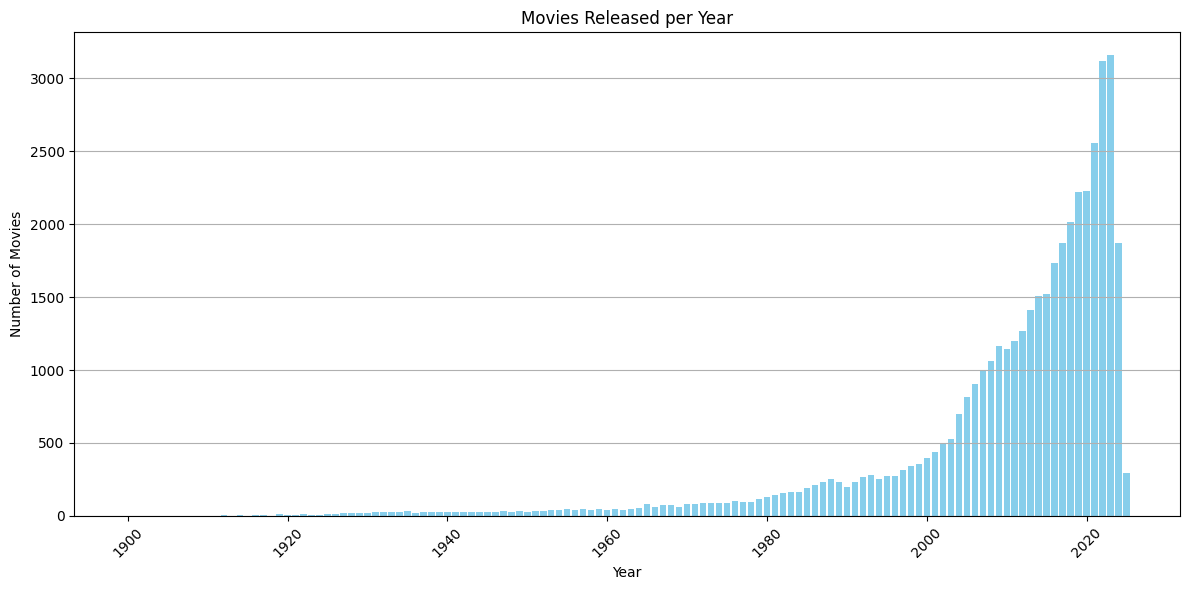

In [11]:
movies_per_year(df)

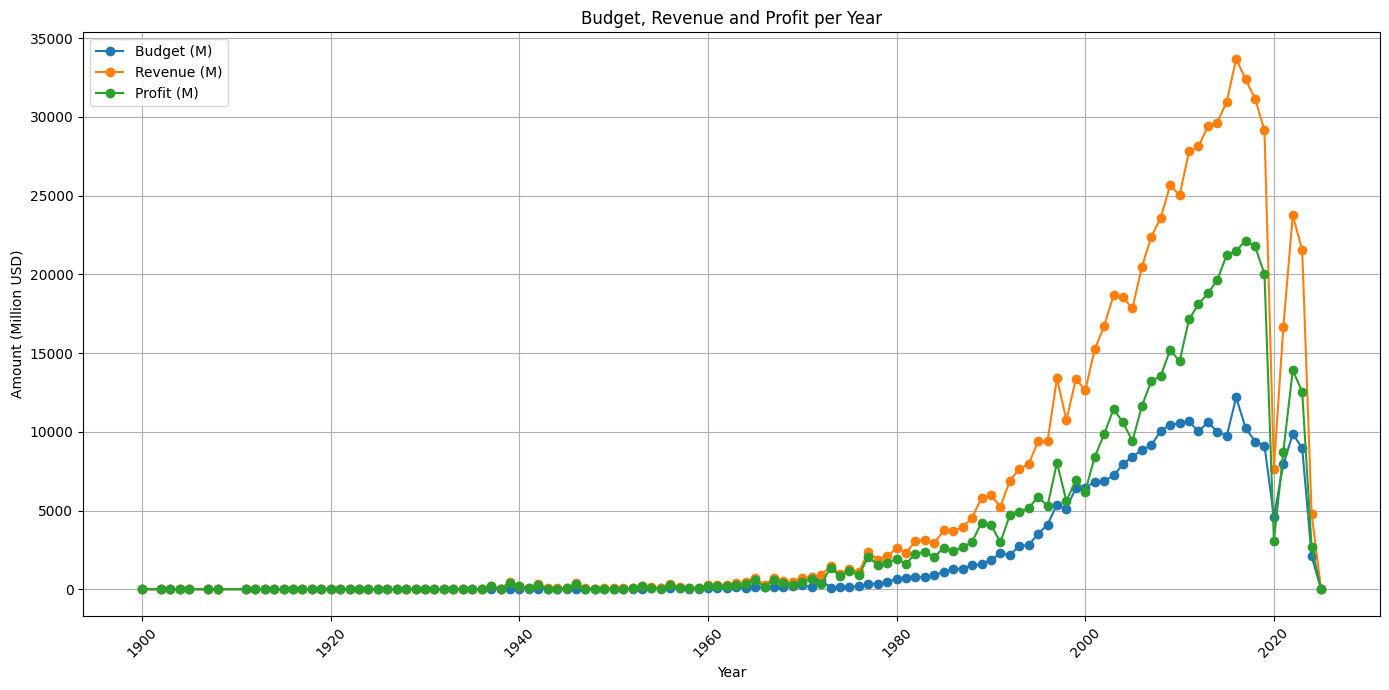

In [12]:
finances_per_year(df)

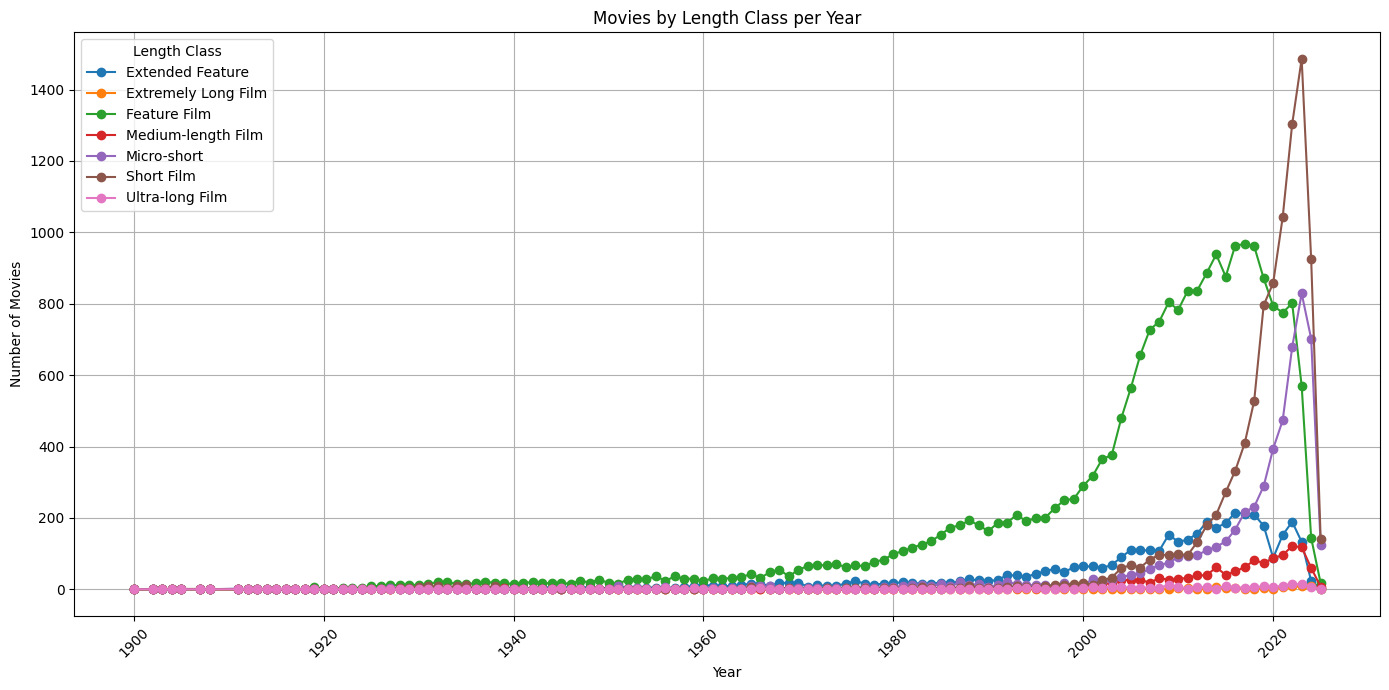

In [13]:
movies_by_length_per_year(df)

Al observar los histogramas, se aprecia claramente que la industria del cine ha experimentado un crecimiento sostenido a lo largo de las décadas, especialmente a partir de los años 2000. Este aumento puede explicarse, en parte, por la democratización de la tecnología audiovisual, que hizo más accesible la producción cinematográfica, y por la llegada de Internet, que facilitó enormemente la documentación, el registro y la difusión de nuevos títulos.

Un punto especialmente relevante es el impacto del período 2019–2020, coincidente con la pandemia de COVID-19. Los datos muestran una caída significativa en la actividad cinematográfica y en los indicadores económicos, evidenciando la crisis global del sector durante ese año. A partir de ese momento también se aprecia un cambio notable en los formatos: las producciones más cortas (shorts y micro-shorts) superan en cantidad a los largometrajes y formatos extendidos. Esto podría deberse a que los formatos breves suelen implicar presupuestos más reducidos y una mayor flexibilidad creativa, además de encajar mejor con los hábitos de consumo actuales, cada vez más orientados a contenidos rápidos y de corta duración.

Por otro lado, los histogramas muestran una disminución aparente en el número de títulos a partir de 2022. Este comportamiento resulta sospechoso y probablemente no refleja una tendencia real del mercado, sino más bien una falta de actualización o un retraso en el registro de datos en el dataset original.

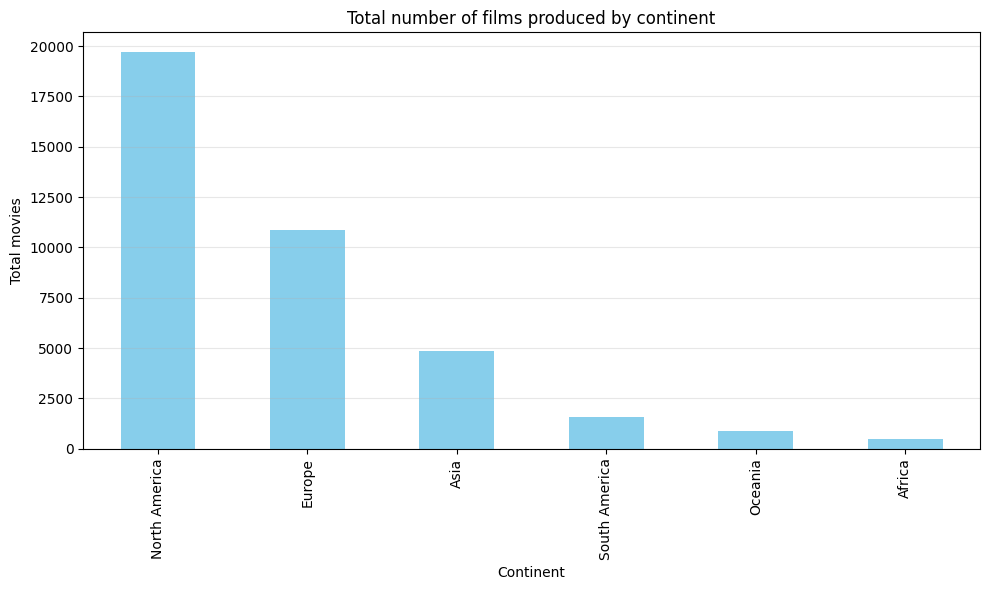

In [14]:
movies_per_continent(df)

<Figure size 1200x700 with 0 Axes>

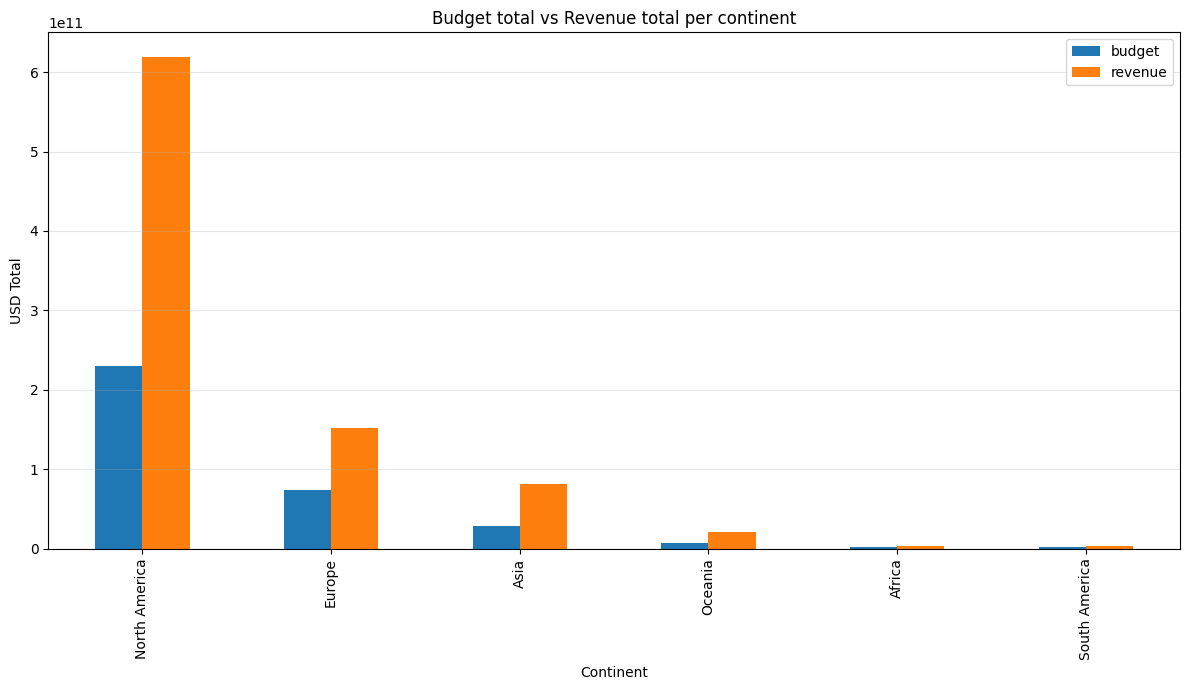

In [15]:
budget_vs_revenue_continent(df)

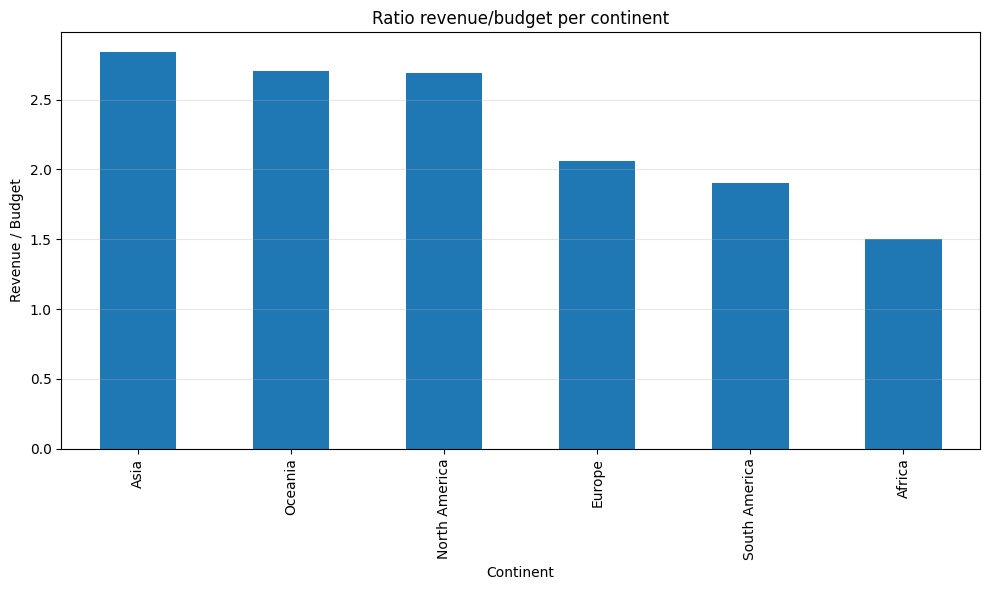

In [16]:
budget_vs_revenue_continent_relation(df)

A partir de los gráficos de columnas, se observa que la mayor parte de las producciones presentes en el dataset provienen de América del Norte, lo que refleja el peso histórico y estructural de esta región en la industria cinematográfica global, especialmente por el predominio de Estados Unidos y, en menor medida, Canadá. Esta concentración también puede deberse a que la base de datos utilizada suele estar más completa y mejor documentada para estas regiones.

Sin embargo, al analizar la relación entre presupuesto (budget) y recaudación (revenue) por continente, surge un resultado interesante:
las películas producidas en Asia y Oceania presentan una eficiencia económica más alta. Es decir, aunque en estas regiónes se produce un número menor de películas dentro del dataset, las que sí aparecen tienden a generar una rentabilidad superior.

Este contraste plantea algunas dudas razonables. Resulta sospechoso que unas industrias aparentemente tan eficiente no tenga un volumen de producción más elevado dentro del dataset. Esto sugiere que la base de datos podría estar infrarepresentando parte de las producciones asiáticas, posiblemente por diferencias en los sistemas de registro, en la disponibilidad de datos o por un sesgo hacia filmografías más vinculadas al mercado occidental.

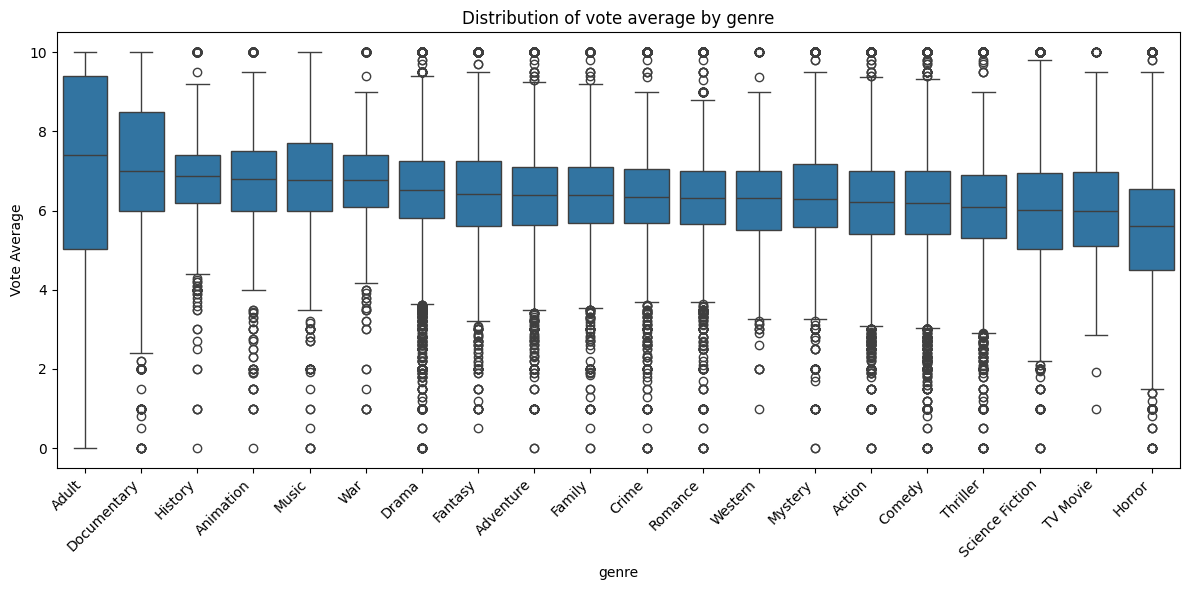

In [17]:
avg_vote_per_genere(df)

El análisis del diagrama de cajas revela una tendencia bastante constante en los votos promedio según las categorías de películas. Destacan especialmente las películas para adultos y los documentales, donde se observa un promedio de votación más alto, aunque con características distintas: las películas para adultos muestran una mayor dispersión en los votos, mientras que los documentales presentan valores más homogéneos.

Por otro lado, las películas de terror registran los promedios más bajos, probablemente debido a la naturaleza del género. Este tipo de películas suele generar reacciones polarizadas: algunas personas no disfrutan o incluso evitan este contenido por su intensidad o temas tratados. Además, se reconoce que lograr una ejecución exitosa en el género de terror es particularmente difícil, lo que puede reflejarse en la menor aceptación promedio por parte del público.

### CONCLUSIONES

El EDA realizado permite comprender mejor la industria cinematográfica y confirma la importancia de limpiar y filtrar el dataset antes de analizarlo. Tras la limpieza, se trabajó con un conjunto fiable de 43.803 películas, con información consistente de presupuesto, recaudación, fecha de estreno y metadatos relevantes.

Se observa un crecimiento sostenido de la producción a lo largo de los años, especialmente desde 2000, con un impacto notable de la pandemia en 2019–2020 y un aumento posterior de formatos cortos, probablemente por su menor coste y mayor adaptación a los hábitos de consumo actuales.

Geográficamente, América del Norte concentra la mayor cantidad de producciones, mientras que Asia y Oceanía muestran una mayor eficiencia económica por película, lo que sugiere que el dataset podría infrarepresentar parte de las producciones de estas regiones.

Por géneros, los documentales y películas para adultos destacan por un mayor promedio de votos, mientras que el terror presenta los más bajos, reflejando la naturaleza polarizadora del género.

Finalmente, se detectan posibles sesgos y limitaciones del dataset, como la caída aparente de títulos recientes y la concentración de datos en ciertas regiones y géneros, que deben considerarse al interpretar los resultados.